# Kaggle Titanic : Machine Learning from Disaster From Scratch ! (Part 1 : Logistic Regression)

***

In Part 1 of this two part notebook , we will explore the idea of logistic regression as a single cell neural network and write a code to classify  the Kaggle Titanic: Machine Learning from Disaster dataset.

## Step 1: Import Libraries and Data
***
Since we are trying to write our own logistic regression function , we will not be using any of the popular machine learning library such as scikit learn. We will only be using Numpy for matrix computations and Pandas to handle our data.

In [297]:
import numpy as np
import pandas as pd
import tqdm

Our dataset is in csv format. 
We use pandas to load the data

In [298]:
data_train = pd.read_csv('Data/train.csv')
data_test = pd.read_csv('Data/test.csv')
print(data_train.shape)
print(data_test.shape)

(891, 12)
(418, 11)


Let us visualize our dataset by taking a look at first five entries of our data

In [299]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our dataset consists of various Attributes such as PassengerID , Name , Sex , Age etc and the attribute called "survived".
Since we are trying to predict whether or not a passanger survived , we will store these values as labels of our dataset Y and rest of the attributes can be regarded as features.
But, first we have to clean up for data and the first step is to look for missing data and fill it.

In [300]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [301]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We are missing a lot of data about the age of passangers from both our training and testing datasets.
We are also missing cabin numbers and the embarkation data, but we can fix that.


### There are a couple of methods of dealing with missing data:
- You can simply ignore the data which has missing entries, but if a significant amount of your data is missing then we will endup throwing away a lot of data.

- Replace the missing data by the some value such as mean, median or mode of the rest of the data.

Since we have a training set of 891 examples and a test set of 418 examples and we are missing a lot of age data, we would be throwing away a lot of the rest of the data if we simply remove the data entires with missing age values. Hence , we will try to fill missing value.
As to what it should be filled with , we can fill them with mean , mode or median of the.
There are other methods such as KNN , MICE or imputation using deeplearning but they are currently beyond our scope.

For this experiment we can just try them all and see what works best !

In [302]:
#function that replaces missing data based on the method and key parameters
def fill_nan(data, key, method = "mean"):
    if method == "mean":
        data[key].fillna(data["Age"].mean(), inplace = True)
    if method == "mode":
        data[key].fillna(data["Age"].mode()[0], inplace = True)
    if method == "median":
        data[key].fillna(data["Age"].median(), inplace = True)


Our fill_nan() function will fill missing age values from our dataset depending on the method that we pass as a parameter.

#### Lets try to fix missing embarkation and fare data.
- Since Embarked is a string which defines what port a person boarded the titanic , the we fill the missing embarkation data with the mode of the dataset.

- Fare data is a float value and again we can just repurpose our fill_nan() function to try out what works best in our case but since only one entry in the test dataset is missing this value , it wont make much of a difference. So , lets just fill it with the mean fare data

But , before we make any changes to our data , lets copy our data into seperate variables so that we still have our original data incase we mess up !

In [303]:
#make copys of our data. deep = true means that each entry of our data also gets copied to a different memory address
data_train_cleaned = data_train.copy(deep = True)
data_test_cleaned = data_test.copy(deep = True)

#calculate stats of our data
data_train_cleaned.describe(include = 'all')
data_test_cleaned.describe(include = 'all')

#clean data
#fill empty age
fill_nan(data_train_cleaned, "Age", "median")
fill_nan(data_test_cleaned, "Age", "median")

#fill empty embarked in train
data_train_cleaned["Embarked"].fillna(data_train_cleaned["Embarked"].mode()[0], inplace = True)

#fill empty fare in test
data_test_cleaned["Fare"].fillna(data_test_cleaned["Fare"].mean(), inplace = True)

The values of "Cabin" is a string which tells the cabin number of the passanger . But since there is really no way to fill missing cabin numbers , we will simply drop that column.

In [304]:
data_train_cleaned = data_train_cleaned.drop("Cabin", axis = 1)
data_test_cleaned = data_test_cleaned.drop("Cabin", axis = 1)

Passanger ID , Name of teh passanger and Ticket number donot play a role in survival of a person , so these columns can be dropped.

In [305]:
data_train_cleaned = data_train_cleaned.drop(["PassengerId", "Name", "Ticket"], axis = 1)
data_test_cleaned = data_test_cleaned.drop(["PassengerId", "Name", "Ticket"], axis = 1)

Let us visualize our data again !

In [306]:
print(data_train_cleaned.head())
print(data_train_cleaned.isnull().sum())
print(data_test_cleaned.isnull().sum())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


As we can see there are no Null values in our dataset and we have removed irrelevant data.
Now , we need to swap the string values of Sex and Embarked by integers inorder to use them as features.

In [307]:
#map Sex of a passenger to interger values , female : 0 , male : 1
data_train_cleaned['Sex'] = data_train_cleaned['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
data_test_cleaned['Sex'] = data_test_cleaned['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

#map embarked of a passenger to integer values S: 0, C : 1, Q : 2
data_train_cleaned['Embarked'] = data_train_cleaned['Embarked'].map({'S' : 0, 'C' : 1, 'Q': 2}).astype(int)
data_test_cleaned['Embarked'] = data_test_cleaned['Embarked'].map({'S' : 0, 'C' : 1, 'Q': 2}).astype(int)

#visualize data
print(data_train_cleaned.head())
print(data_test_cleaned.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         0
1         1       1    0  38.0      1      0  71.2833         1
2         1       3    0  26.0      0      0   7.9250         0
3         1       1    0  35.0      1      0  53.1000         0
4         0       3    1  35.0      0      0   8.0500         0
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         2
1       3    0  47.0      1      0   7.0000         0
2       2    1  62.0      0      0   9.6875         2
3       3    1  27.0      0      0   8.6625         0
4       3    0  22.0      1      1  12.2875         0


Now that we have cleaned and prepare our data , we can proceed with programming our logistic regression unit.

Let us first rearrange our data into X_train ( training dataset containng 70% of the data_train_cleaned) , Y_train ( labels of training dataset ), X_val ( our validation dataset which will be 30% of data_train_cleaned ), Y_val ( labels of our validation dataset) 

In [308]:
#make a copy of our data to slice it
X_data = data_train_cleaned.copy(deep = True).values # .values converst pandas dataframe to a numpy array

#split data into train and val
X_train = X_data[:623] #70% of our training data 891 is ~ 623 values
X_val = X_data[623:] #30% of our training data is ~ 268 values

# labels are " survived " column of the dataset
Y_train = X_train[:,0]
Y_val = X_val[:,0]

#remove labels from dataset and only keep features
X_train = np.delete(X_train, 0, axis = 1)
X_val = np.delete(X_val, 0, axis = 1)

#print data for sanity check
print("x train : " + str(X_train))
print("x val : " + str(X_val))
print("y train:"+ str(Y_train))
print("y val : " +str(Y_val))

#print shapes for sanity check
print("x train :" + str(X_train.shape))
print("x val :" + str(X_val.shape))
print("y train :" + str(Y_train.shape))
print("y val :" + str(Y_val.shape) )

x train : [[ 3.      1.     22.     ...  0.      7.25    0.    ]
 [ 1.      0.     38.     ...  0.     71.2833  1.    ]
 [ 3.      0.     26.     ...  0.      7.925   0.    ]
 ...
 [ 3.      1.     27.     ...  0.     14.4542  1.    ]
 [ 1.      1.     42.     ...  0.     52.5542  0.    ]
 [ 3.      1.     20.     ...  1.     15.7417  1.    ]]
x val : [[ 3.      1.     21.     ...  0.      7.8542  0.    ]
 [ 3.      1.     21.     ...  0.     16.1     0.    ]
 [ 1.      1.     61.     ...  0.     32.3208  0.    ]
 ...
 [ 3.      0.     28.     ...  2.     23.45    0.    ]
 [ 1.      1.     26.     ...  0.     30.      1.    ]
 [ 3.      1.     32.     ...  0.      7.75    2.    ]]
y train:[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 

Our Labels are weird rank 1 arrays and our training sets are arranged such that eash row is a training feature and each column is an example.

Let is rearrange it such that each column of our training set is a different training example and our labels are a one dimentional column vector

In [309]:
# rearrange data such that each column is a different training example
X_train = X_train.T
X_val = X_val.T

#fix our lable matrix
Y_train = Y_train.reshape((623, 1))
Y_val = Y_val.reshape((268, 1))

#sanity check
print("x train :" + str(X_train.shape))
print("x val :" + str(X_val.shape))
print("y train :" + str(Y_train.shape))
print("y val :" + str(Y_val.shape) )

x train :(7, 623)
x val :(7, 268)
y train :(623, 1)
y val :(268, 1)


Now we are ready to write our logistic regression !


As discussed earlier , Logistic regression can be thought of as a single cell neural network with $ W^{(n)} $ parameters, where $n$ is the number of features and a single bias $b$

We use sigmoid activation function where $\sigma(z) = \dfrac{1}{1 + e^{-z}}$

Lets take a look at the sigmoid activation function !

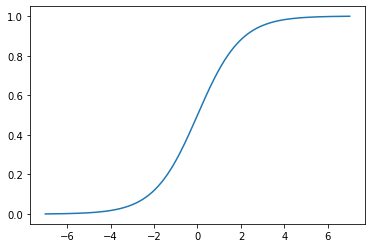

In [322]:
#import matplotlib to plot our sigmoid function
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(-7, 7, 200)

#define sigmoid function
def sigmoid(x):
    sig = 1/(1 + np.exp(-x))
    return sig

plt.plot(x, sigmoid(x))

As we can see, the sigmoid function maps values on x axis to values on y axis between 0 and 1.
This can be interpreted as the probability of an event occuring.
In our case , probability being close to 1 means that the person may have survived the titanic disaster !

A more detailed explanation as to why we use this function, can be found here : https://qr.ae/pNnoDa

Other advantages of logistic regression is that for lower values i.e between -2.5 and 2.5 , the gradient of the function is quite large, leading to faster learning through gradient descent !

Since small values mean that our algorithm learns faster , we standardize our dataset which is a form of feature scaling!
You can learn more about feature scaling here : https://en.wikipedia.org/wiki/Feature_scaling

EDIT : While scaling, make sure to scale all the data by the same scaling factor !

In [311]:
# inorder to standardize our dataset , we will subtract all features of our dataset by their mean
# and divide it by the standard deviation of the features.
# this will center the data and normalize our values so that gradient descent converges faster !
def calc_stats(data):
    mu = data.mean(axis = 1, keepdims = True)
    sigma = data.std(axis = 1, keepdims = True)
    return mu, sigma

def standardize(data, mu, sigma):
    std_data = (data - mu) / sigma
    return std_data
mu, sigma = calc_stats(X_train)
X_train = standardize(X_train, mu, sigma)
X_val = standardize(X_val, mu, sigma)

#sanity check !
print(X_train.shape)
print(X_train[:5])

(7, 623)
[[ 0.82770401 -1.57071272  0.82770401 ...  0.82770401 -1.57071272
   0.82770401]
 [ 0.76764947 -1.30267789 -1.30267789 ...  0.76764947  0.76764947
   0.76764947]
 [-0.5792537   0.67215525 -0.26640146 ... -0.1881884   0.98500749
  -0.73567982]
 [ 0.42388749  0.42388749 -0.49947581 ...  0.42388749  0.42388749
   0.42388749]
 [-0.48340844 -0.48340844 -0.48340844 ... -0.48340844 -0.48340844
   0.78198425]]


Now that we have Normalized and centered our data , We are ready to write the Forward , backward propagation and gradient descent !

First, we write a function to initialize our parameters based on the number of input features

In [312]:
# initialize parameters
def initialize_parameters(dim):
    W = np.zeros((dim, 1))
    b = 0
    return W, b

Now that we have initialized our parameters , we can make a prediction $A$ such that $A = \sigma(Z)$ where, $Z = W^T.X + b $

In [313]:
#forward propagation
def forward_prop(X, W, b):
#     #sanity check
#     print("forward prop")
#     print("X shape:" + str(X.shape))
#     print("W shape:" + str(W.shape))
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    return A.T

We will pass the value $Z$ to the sigmoid function that we wrote earlier to make a prediction.
We need to use gradient descent algorithm to minimize the error of our prediction.

We could use mean squared error , but as it turns out , for logistic regression , mean squared error leads
to a non convex surface. Our gradient descent works best in cases where our error forms a convex surface.

$$ MSE=\frac{1}{m}\sum_{i=1}^n(Y_i-\hat{Y_i})^2 $$

Where $Y$ is our actual lable , $\hat{Y}$ is our prediction and $m$ are the number of training examples

For logistic regression, we typically use something called as cross entropy loss, which leads to a nice convex surface for our gradient descent 

$$ J = -\frac1m\sum_{m=1}^M\ \bigg[y_n  \log \hat y_n + (1 - y_n)  \log (1 - \hat y_n)\bigg] $$

Learn More : https://rohanvarma.me/Loss-Functions/

In [314]:
#cost function
def compute_cost(Y, A):
#     #sanity check
#     print("computing cost")
#     print("Y shape:" + str(Y.shape))
#     print("A shape:" + str(A.shape))
    J = - np.sum(np.dot(Y.T, np.log(A)) + np.dot((1 - Y).T, np.log(1 - A)))/Y.shape[0]
    return J

Now that we have computed the cost / error of our predictions , we can compute the gradients which will be required for our gradient descent.

We use the chain rule of multivariate calculus to calculate the gradient of our parameters W and B using chain rule.

The relationship between our parameters $W$ and $b$ and our cost function $J$ can be defined as follows:

$$ Z = W^TX + b $$
$$ A = \sigma(Z) $$
$$ J = -\frac1m\sum_{m=1}^M\ \bigg[Y  \log A + (1 - Y)  \log (1 - A)\bigg] $$

By applying chain rule, 

$$ \frac {\partial J}{\partial W} = \frac {\partial J}{\partial A} \frac {\partial A}{\partial Z} \frac {\partial Z}{\partial W} $$

And, 

$$ \frac {\partial J}{\partial b} = \frac {\partial J}{\partial A} \frac {\partial A}{\partial Z} \frac {\partial Z}{\partial b} $$

If we work through the differentiation, we get the solutions :

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

Proof of this solution can be found here : https://stats.stackexchange.com/a/278812

in our code, we will be writing the value $ \frac{\partial J}{\partial w} $ as dW and value $\frac{\partial J}{\partial b}$ as db.

Let use proceed to writing our back propagtion function

In [315]:
# back prop function
def back_prop(X, Y, A):
    #sanity check
#     print("back_prop")
#     print("X shape:" + str(X.shape))
#     print("Y shape:" + str(Y.shape))
#     print("A shape:" + str(A.shape))
    dW = np.dot(X, (A-Y))/X.shape[1]
    db = np.sum(A - Y)/X.shape[1]
    
    return dW, db

Now that we have calculated our gradients, we can use gradient descent algorithm to update our parameters.
Gradient Descent : https://en.wikipedia.org/wiki/Gradient_descent

In [316]:
#gradient descent
def gradient_descent(W, b, dW, db, learning_rate = 0.001):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

Now that we have defined all of our helper functions, we can puttogether our logistic regresion model !

In [317]:
# Logistic regression function !
def logistic_regression(X, Y, num_iterations, learning_rate, print_cost = False, cost_graph = False):
    m = X_train.shape[1] #number of training examples
    W, b = initialize_parameters(X_train.shape[0]) #initialize learning parameters
    for i in tqdm.tqdm(range(num_iterations)):
        
        A = forward_prop(X, W, b)
        cost = compute_cost(Y, A)
        dW, db = back_prop(X, Y, A)
        W, b = gradient_descent(W, b, dW, db, learning_rate)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))    
    if cost_graph == True:
        plt.plot(costs)
    return W, b

After training our logistic regression model , we need to make predictions for our validation dataset and check their accuracy !

In [318]:
#make predictions !
def predict(X_val, W, b):
    predictions = forward_prop(X_val, W, b)
    
    #map predictions below 0.5 to 0 and above 0.5 to 1
    predictions[predictions > 0.5] = int(1)
    predictions[predictions < 0.5] = int(0)
    return predictions

# calculate accuracy
def test_accuracy(predictions, Y_val):
    accuracy = np.sum(predictions == Y_val)/predictions.shape[0]*100
    return accuracy

Finally , lets Run our code !

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 17543.91it/s]


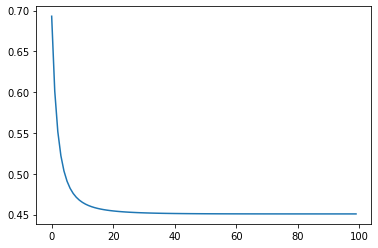

In [319]:
costs = [] #store cost to plot against iterations
W, b = logistic_regression(X_train, Y_train, 10000, 0.01, cost_graph = True)

Let us test the accuracy of our predictions using these parameters !

In [320]:
#make predictions on our validation dataset
preds_train = predict(X_train, W, b)
preds_val = predict(X_val, W, b)
#calculate accuracy of our predictions
print(f"Accuracy on train data {test_accuracy(preds_train, Y_train)}%")
print(f"Accuracy on validation data {test_accuracy(preds_val, Y_val)}%")

Accuracy on train data 80.09630818619583%
Accuracy on validation data 80.59701492537313%


Now , we use our trained parameters to make predictions on our test dataset and save the results as CSV ! 

In [321]:
#import test dataset
X_test = data_test_cleaned.values

#standardize test dataset
X_test = X_test.T
X_test = standardize(X_test, mu, sigma)

#make predictions
predictions_test = predict(X_test, W, b).astype(int)

#compile into a dataframe
predictions_df = pd.DataFrame({ 'PassengerId': data_test["PassengerId"], 'Survived': predictions_test[:,0]})

#export dataframe as csv
predictions_df.to_csv("Logistic_regression.csv", index = False)

predictions_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


This gets about 65% accuracy on test dataset according to kaggle.

EDIT : Gets 75% accuracy now after fixing the Scaling factor, Earlier , it would standardize the train and test datasets based on their own means and standard deviations. Fixed it so that the test data also uses the same mean and standard deviation as train data. This leads to a huge improvement !